In [1]:
import utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
man, woman = utils.pick_random_files(50, random_state=42)

In [4]:
# from scipy.io.wavfile import read

# fs, signal = read('cmu_us_bdl_arctic/wav/arctic_a0001.wav')
# mfcc = utils.mfcc(signal, 21, 10, fs)


# # plt.plot(mfcc.T)

In [5]:
fs = []
duration = []
autocorr_pitch_mean = []
autocorr_pitch_median = []
cepstrum_pitch_mean = []
cepstrum_pitch_median= []
form = {}
mfcc = {}
f_max = []
n_formants = []
speaker = []

In [6]:
width = 21
step = 10
threshold = 5
dn_formants = 13

for i in range(13):
        mfcc[f'mfcc{i}'] = []
        
for i in range(dn_formants):
        form[f'f{i}'] = []

for sfs, signal in man:
    formants = utils.formants(signal, width, step, sfs)
    auto_pitch = utils.get_pitch(signal, width, step, sfs, threshold, methode=utils.autocorrelation, extend=False)
    smfcc = utils.mfcc(signal, width, step, sfs)
    
    for i in range(smfcc.shape[1]):
        mfcc[f'mfcc{i}'].append(smfcc[:,i].mean())
    
    for i, f in enumerate(formants[:dn_formants]):
        form[f'f{i}'].append(f)
    
    fs.append(sfs)
    duration.append(signal.size/sfs)
    cepstrum_pitch = utils.get_pitch(signal, width, step, sfs, threshold, methode=utils.cepstrum, extend=False)
    autocorr_pitch_mean.append(auto_pitch.mean())
    autocorr_pitch_median.append(np.median(auto_pitch))
    cepstrum_pitch_mean.append(cepstrum_pitch.mean())
    cepstrum_pitch_median.append(np.median(cepstrum_pitch))
    f_max.append(formants[-1])
    n_formants.append(formants.size)
    speaker.append('bdl')
    
for sfs, signal in woman:
    formants = utils.formants(signal, width, step, sfs)
    auto_pitch = utils.get_pitch(signal, width, step, sfs, threshold, methode=utils.autocorrelation, extend=False)
    smfcc = utils.mfcc(signal, width, step, sfs)
    
    for i in range(smfcc.shape[1]):
        mfcc[f'mfcc{i}'].append(smfcc[:,i].mean())
    
    for i, f in enumerate(formants[:dn_formants]):
        form[f'f{i}'].append(f)
    
    fs.append(sfs)
    duration.append(signal.size/sfs)
    cepstrum_pitch = utils.get_pitch(signal, width, step, sfs, threshold, methode=utils.cepstrum, extend=False)
    autocorr_pitch_mean.append(auto_pitch.mean())
    autocorr_pitch_median.append(np.median(auto_pitch))
    cepstrum_pitch_mean.append(cepstrum_pitch.mean())
    cepstrum_pitch_median.append(np.median(cepstrum_pitch))
    f_max.append(formants[-1])
    n_formants.append(formants.size)
    speaker.append('slt')

In [7]:
d = {'fs': fs, 'duration': duration, 'autocorr_pitch_mean': autocorr_pitch_mean, 'autocorr_pitch_median': autocorr_pitch_median,
     'cepstrum_pitch_mean': cepstrum_pitch_mean, 'cepstrum_pitch_median': cepstrum_pitch_median,
     'f_max': f_max, 'n_formants': n_formants, 'speaker': speaker}
d.update(mfcc)
d.update(form)
df = pd.DataFrame(data=d)

In [8]:
df

fs  duration  autocorr_pitch_mean  autocorr_pitch_median  \
0   16000  3.305063          1580.222953             695.652174   
1   16000  1.315063          1772.818679            1036.437247   
2   16000  2.995062           830.571465             592.592593   
3   16000  3.315062          1179.242166             666.666667   
4   16000  2.525000          1089.054476             516.129032   
..    ...       ...                  ...                    ...   
95  16000  3.235063           690.902015             627.692308   
96  16000  1.705062          1229.799918             533.333333   
97  16000  1.875063           809.295304             592.592593   
98  16000  1.985062           605.360746             551.724138   
99  16000  2.975062           555.718870             484.848485   

    cepstrum_pitch_mean  cepstrum_pitch_median        f_max  n_formants  \
0            214.641293             131.147541  7087.963868        1290   
1            265.161116             227.356069  7245.482202         495   
2            247.241679             153.113553  7182.390209        1184   
3            214.398199             141.592920  7213.718039        1300   
4            226.119623             140.350877  7169.457145         985   
..                  ...                    ...          ...         ...   
95           185.286140             168.421053  7141.401775        1241   
96           196.852274             173.913043  7134.850138         663   
97           193.456533             188.235294  7180.107290         731   
98           219.066908             190.476190  7094.701245         768   
99           227.192413             186.046512  7128.569074        1151   

   speaker       mfcc0  ...          f3          f4          f5          f6  \
0      bdl  610.808756  ...  153.575350  162.795765  165.633564  172.576816   
1      bdl  600.383026  ...  190.072614  194.676671  202.773801  203.583770   
2      bdl  577.538648  ...  191.781542  193.579341  194.536136  198.463408   
3      bdl  592.429400  ...  114.793706  158.555327  184.613443  192.166162   
4      bdl  594.046052  ...  118.165794  155.283052  156.220195  171.068525   
..     ...         ...  ...         ...         ...         ...         ...   
95     slt  588.899087  ...  120.163280  123.717396  142.637397  152.524456   
96     slt  628.392975  ...  203.785900  207.248626  210.490496  223.218104   
97     slt  637.695047  ...  194.669279  201.383711  202.133119  211.596486   
98     slt  596.140066  ...  187.855254  193.612853  194.015381  195.703780   
99     slt  541.183292  ...  112.580503  143.880154  152.767935  159.134648   

            f7          f8          f9         f10         f11         f12  
0   180.613994  181.682328  185.468809  191.302801  195.448769  196.454293  
1   204.085768  209.311980  209.813350  211.611190  213.994076  216.564399  
2   199.589873  203.329285  205.310178  206.842708  209.980700  210.242885  
3   192.366336  194.103369  194.685926  194.864262  195.495360  196.243490  
4   179.743873  183.006839  186.298546  186.335039  193.248200  199.527332  
..         ...         ...         ...         ...         ...         ...  
95  153.863838  154.024856  158.847654  164.402522  164.664536  167.272267  
96  232.606548  234.569992  242.049770  250.781389  254.720413  254.907170  
97  253.802587  266.215446  277.341024  296.698914  310.455913  313.207016  
98  196.284168  196.543363  198.143889  198.704236  204.876264  206.310538  
99  167.210048  170.197928  178.811474  180.516517  182.710489  187.732454  

[100 rows x 35 columns]

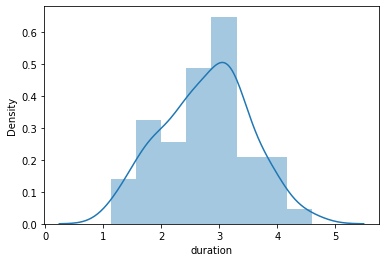

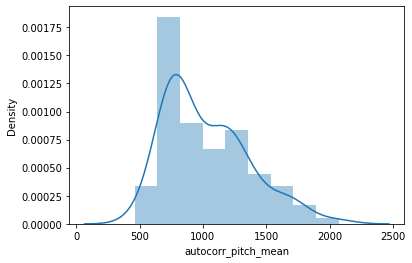

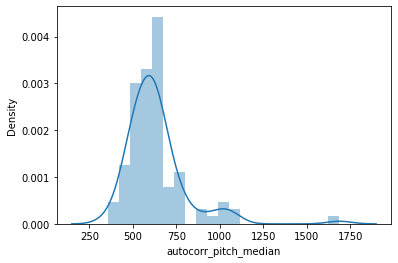

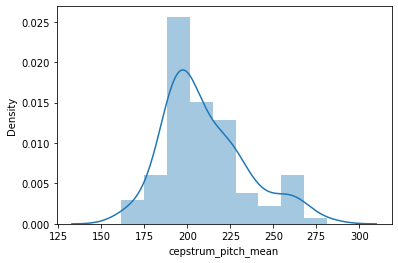

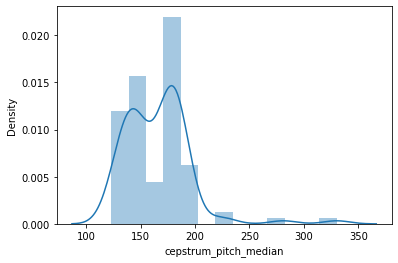

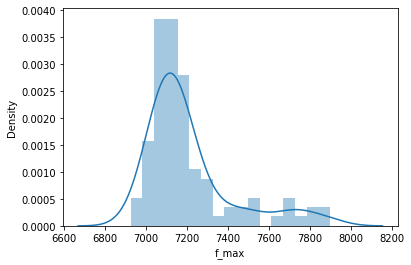

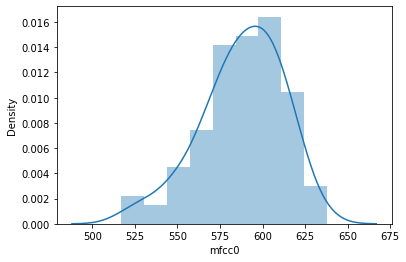

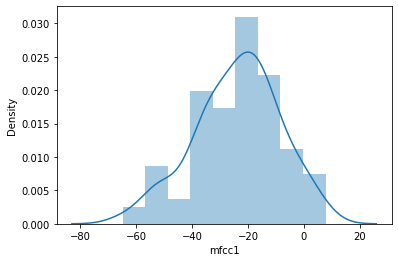

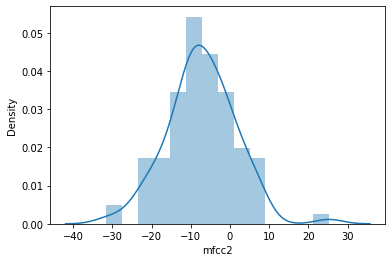

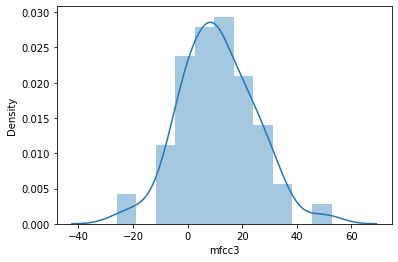

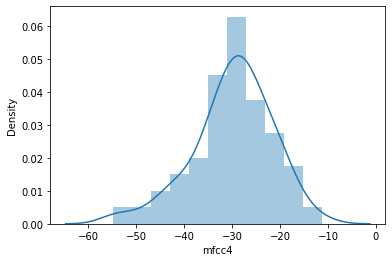

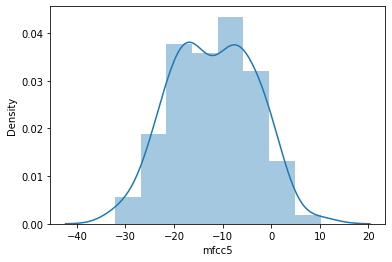

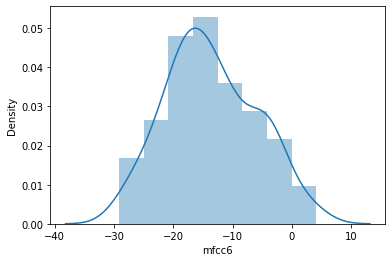

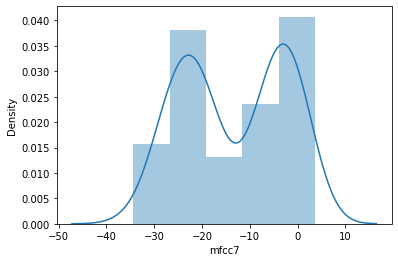

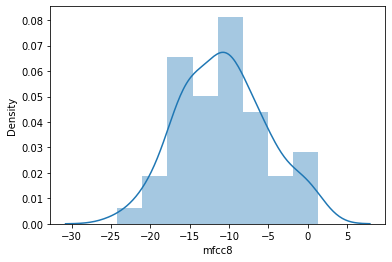

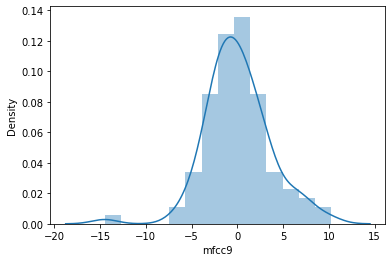

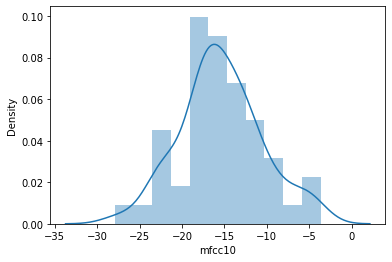

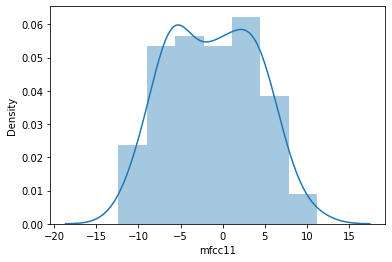

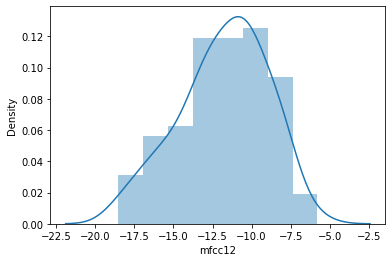

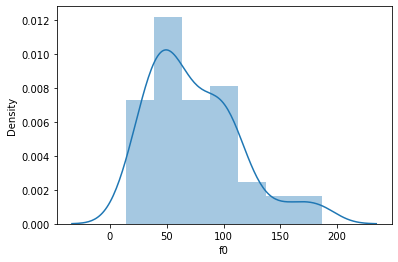

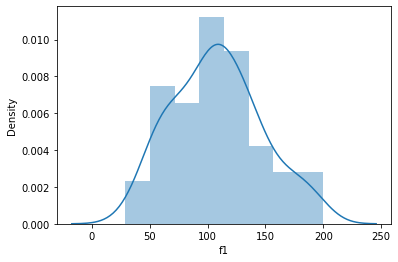

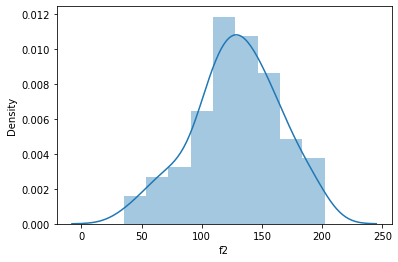

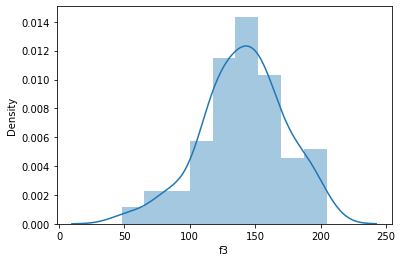

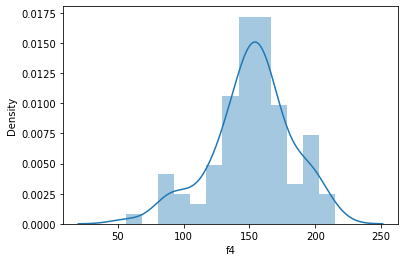

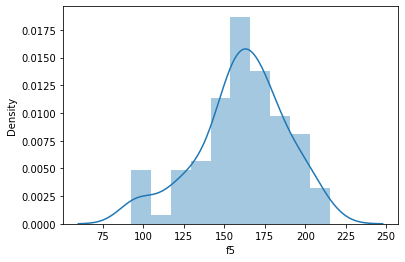

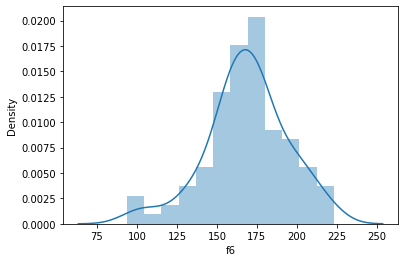

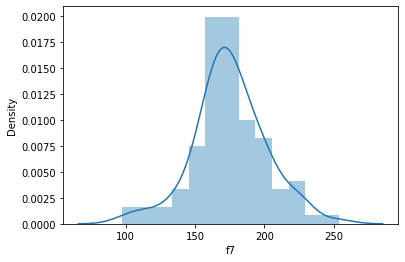

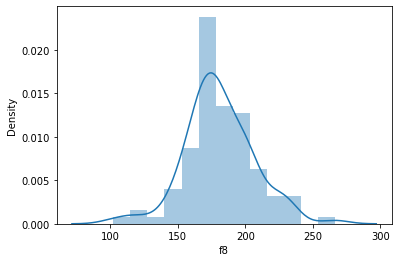

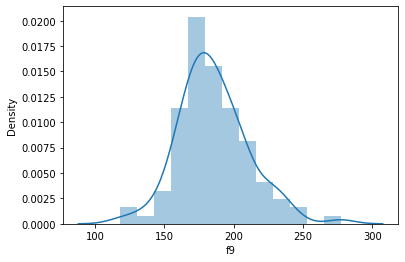

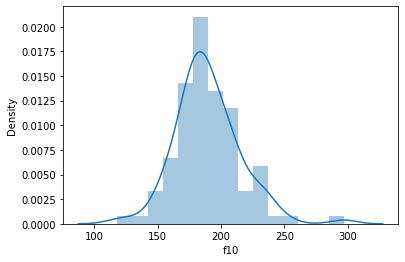

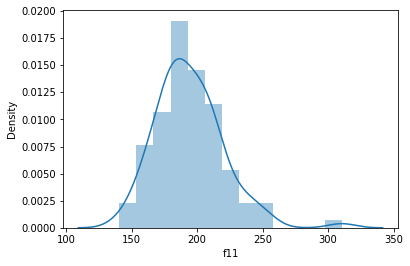

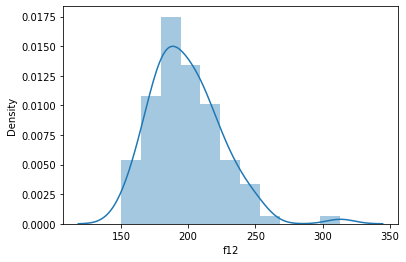

In [9]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

In [10]:
bdl_df = df[df['speaker']=='bdl']
slt_df = df[df['speaker']=='slt']

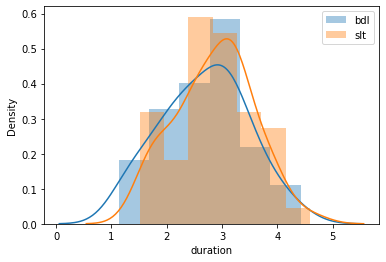

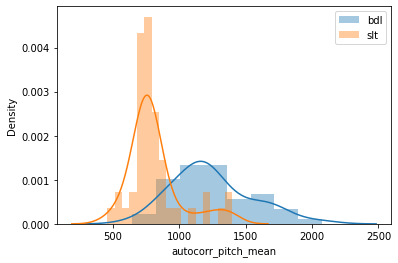

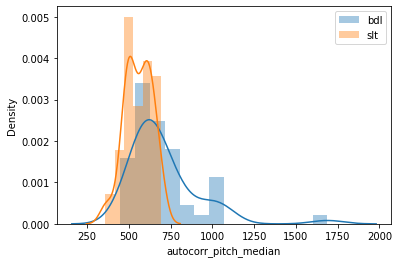

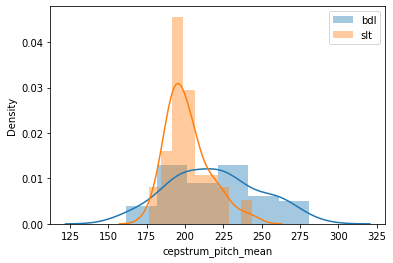

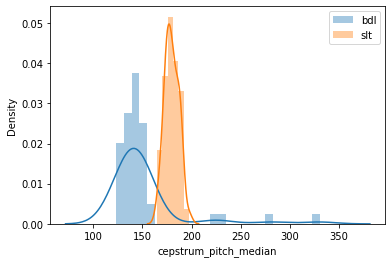

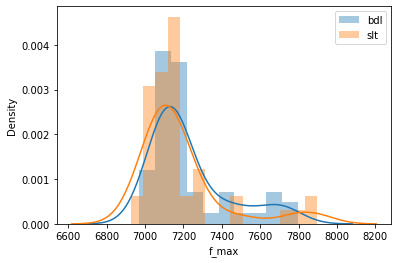

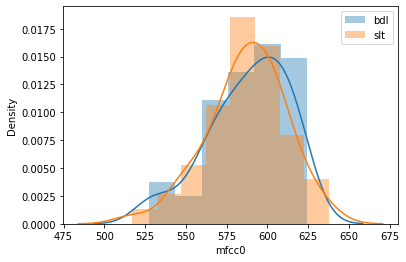

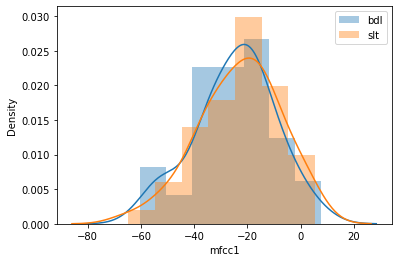

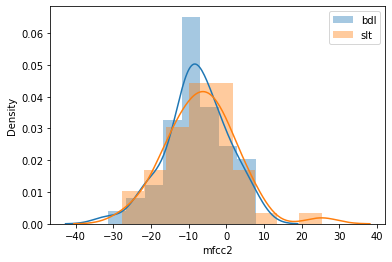

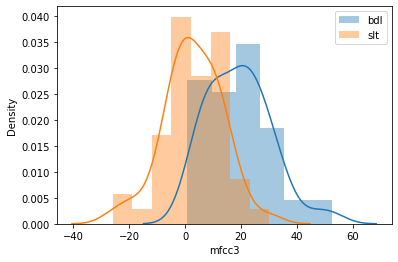

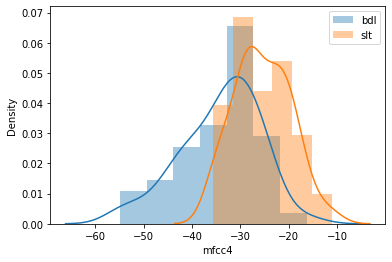

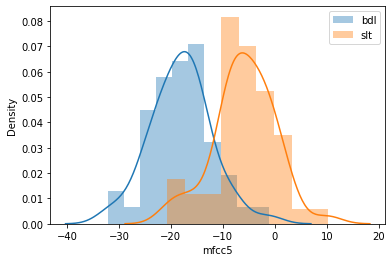

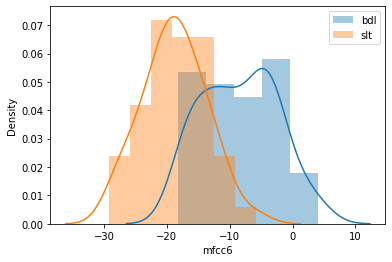

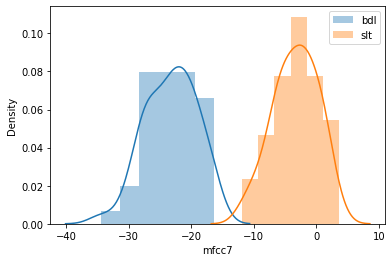

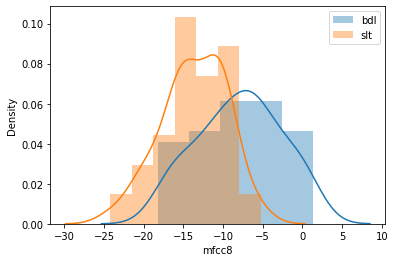

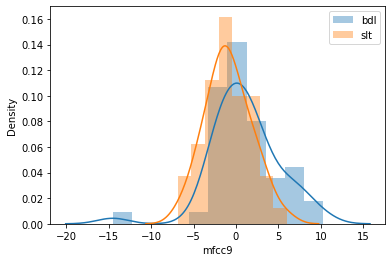

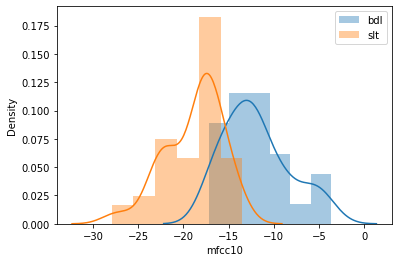

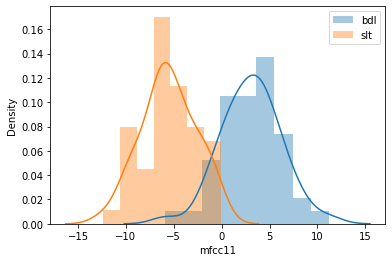

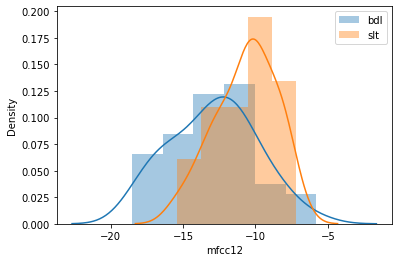

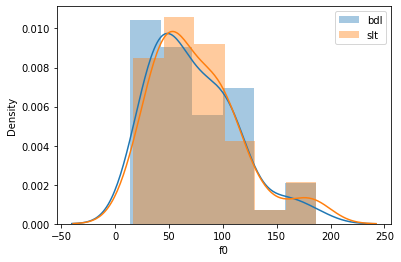

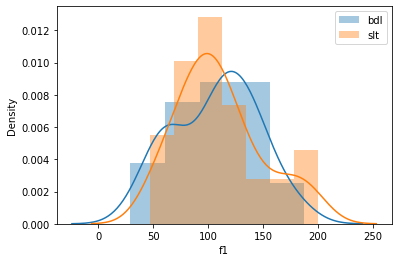

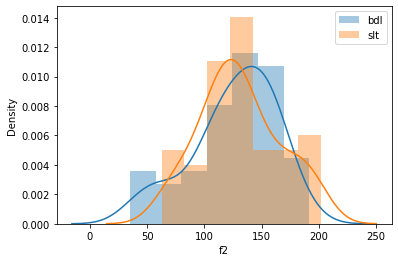

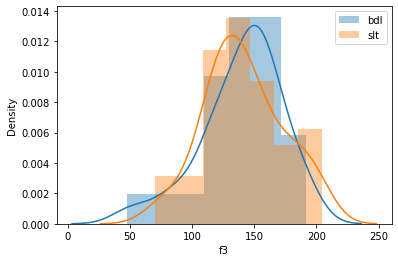

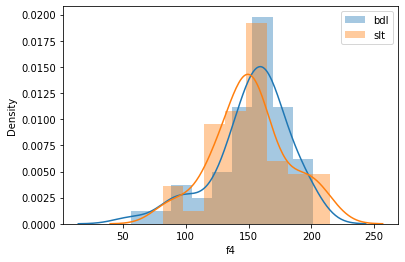

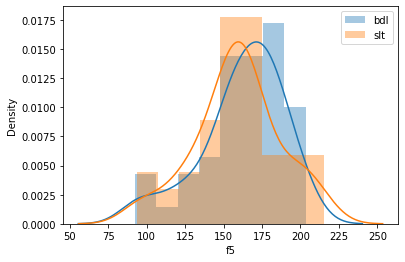

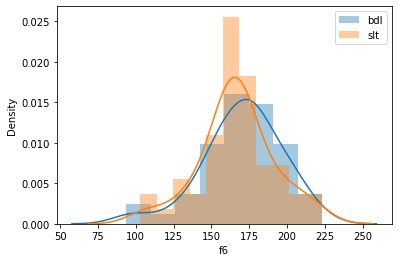

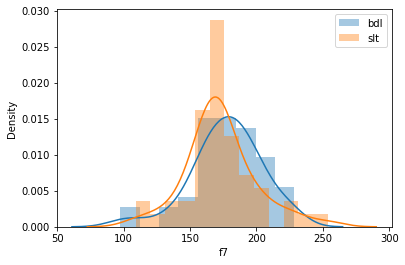

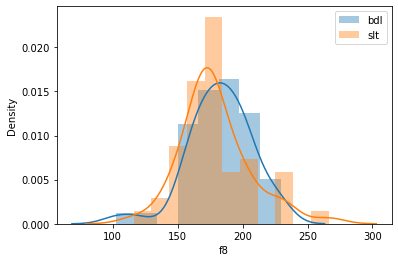

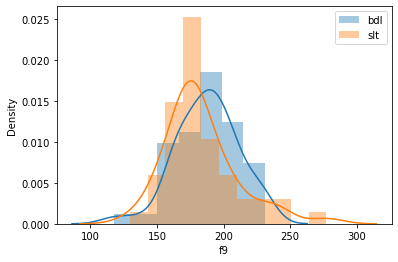

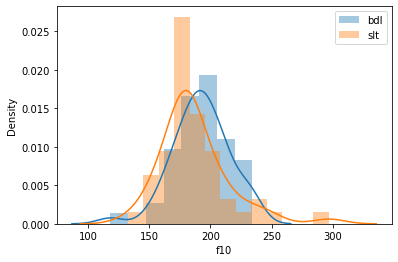

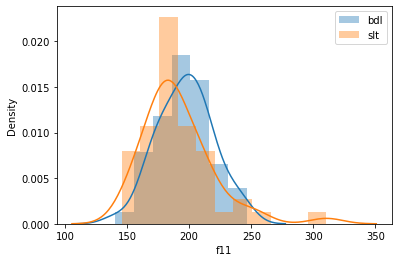

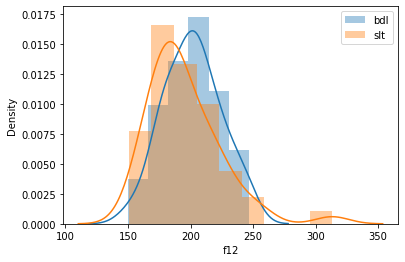

In [11]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(bdl_df[col], label='bdl')
    sns.distplot(slt_df[col], label='slt')
    plt.legend()

In [52]:
man, woman = utils.pick_random_files(300, random_state=68)

fs = []
duration = []
autocorr_pitch_mean = []
autocorr_pitch_median = []
cepstrum_pitch_mean = []
cepstrum_pitch_median= []
form = {}
mfcc = {}
f_max = []
n_formants = []
speaker = []


width = 21
step = 10
threshold = 5
dn_formants = 13

for i in range(13):
        mfcc[f'mfcc{i}'] = []
        
for i in range(dn_formants):
        form[f'f{i}'] = []

for sfs, signal in man:
    formants = utils.formants(signal, width, step, sfs)
    auto_pitch = utils.get_pitch(signal, width, step, sfs, threshold, methode=utils.autocorrelation, extend=False)
    smfcc = utils.mfcc(signal, width, step, sfs)
    
    for i in range(smfcc.shape[1]):
        mfcc[f'mfcc{i}'].append(smfcc[:,i].mean())
    
    for i, f in enumerate(formants[:dn_formants]):
        form[f'f{i}'].append(f)
    
    fs.append(sfs)
    duration.append(signal.size/sfs)
    cepstrum_pitch = utils.get_pitch(signal, width, step, sfs, threshold, methode=utils.cepstrum, extend=False)
    autocorr_pitch_mean.append(auto_pitch.mean())
    autocorr_pitch_median.append(np.median(auto_pitch))
    cepstrum_pitch_mean.append(cepstrum_pitch.mean())
    cepstrum_pitch_median.append(np.median(cepstrum_pitch))
    f_max.append(formants[-1])
    n_formants.append(formants.size)
    speaker.append('bdl')
    
for sfs, signal in woman:
    formants = utils.formants(signal, width, step, sfs)
    auto_pitch = utils.get_pitch(signal, width, step, sfs, threshold, methode=utils.autocorrelation, extend=False)
    smfcc = utils.mfcc(signal, width, step, sfs)
    
    for i in range(smfcc.shape[1]):
        mfcc[f'mfcc{i}'].append(smfcc[:,i].mean())
    
    for i, f in enumerate(formants[:dn_formants]):
        form[f'f{i}'].append(f)
    
    fs.append(sfs)
    duration.append(signal.size/sfs)
    cepstrum_pitch = utils.get_pitch(signal, width, step, sfs, threshold, methode=utils.cepstrum, extend=False)
    autocorr_pitch_mean.append(auto_pitch.mean())
    autocorr_pitch_median.append(np.median(auto_pitch))
    cepstrum_pitch_mean.append(cepstrum_pitch.mean())
    cepstrum_pitch_median.append(np.median(cepstrum_pitch))
    f_max.append(formants[-1])
    n_formants.append(formants.size)
    speaker.append('slt')
    
    
d = {'fs': fs, 'duration': duration, 'autocorr_pitch_mean': autocorr_pitch_mean, 'autocorr_pitch_median': autocorr_pitch_median,
     'cepstrum_pitch_mean': cepstrum_pitch_mean, 'cepstrum_pitch_median': cepstrum_pitch_median,
     'f_max': f_max, 'n_formants': n_formants, 'speaker': speaker}
d.update(mfcc)
d.update(form)
df_test = pd.DataFrame(data=d)

In [50]:
def rule_based_model(X):
    if X['mfcc7'] >= -12:
        return 'slt'
    else:
        return 'bdl'

<AxesSubplot:xlabel='perdict', ylabel='speaker'>

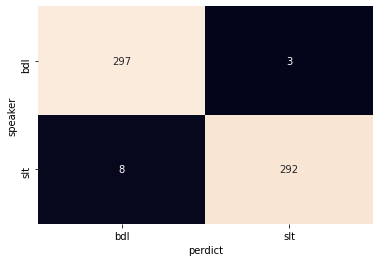

In [53]:
df_test.head()
df_test_X = df_test.drop(['speaker'], axis=1)
df_test_y = df_test[['speaker']]

df_test_y['perdict'] = df_test_X.apply(rule_based_model, axis=1)
sns.heatmap(pd.crosstab(df_test_y['speaker'], df_test_y['perdict']), annot=True, fmt='d', cbar=False)